In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import json

<img src='../images/addGaussianNoise.png'>

In [2]:
with open('../utils.json', 'r') as f:    
    json_data = json.load(f)
    file_path = json_data['data']['path']

In [3]:
with h5py.File(file_path, 'r') as h5f:
    traces = h5f['traces'][()]
    plaintexts = h5f['plaintext'][()]
    ciphertexts = h5f['ciphertext'][()]
    keys = h5f['keys'][()]

##### 生成随机高斯噪声,打包成numpy数组

高斯噪声概率密度函数如下
$$
p(x) = \frac{1}{{2\pi{\sigma}^2}} \ exp{(-\frac{(x-mean)^2}{2\sigma^2})}
$$

In [10]:
import random
def getRandomNoiseList(shape, std, mean=0):
    # 标准差控制噪声严重程度
    return np.random.normal(mean, std, shape).astype(dtype=np.float32)

In [20]:
def addGaussianNoise(traces, std, mean=0):
    noise_traces = np.zeros(shape=traces.shape)
    for index, trace in enumerate(traces):
        noise = getRandomNoiseList(len(trace), std, mean)
        noise_traces[index] = trace + noise
    return noise_traces

In [25]:
noise_traces = addGaussianNoise(traces, 3000)   # 标准差

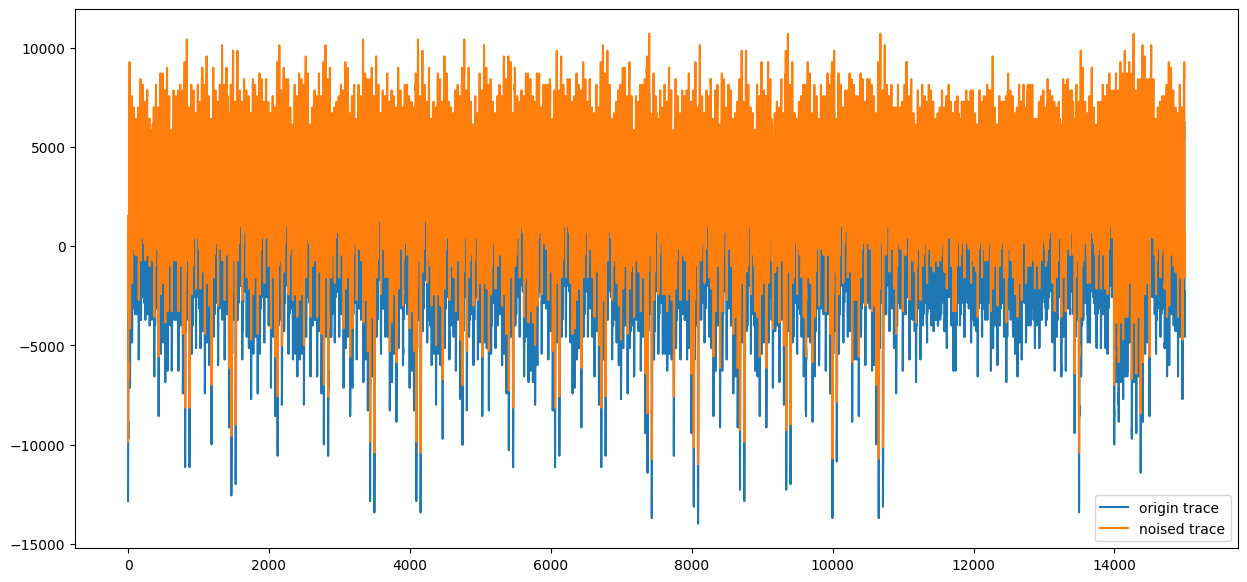

In [26]:
plt.figure(figsize=(15, 7))
x = range(traces.shape[1])
i = 1
plt.plot(traces[i], label='origin trace')
plt.plot(noise_traces[i], label='noised trace')
plt.legend()
plt.savefig('./result.png')
plt.show()